# Perceptron

### Definition:

Perceptron was introduced by Frank Rosenblatt in 1957. He proposed a Perceptron learning rule based on the original MCP neuron. A Perceptron is an algorithm for supervised learning of binary classifiers. This algorithm enables neurons to learn and processes elements in the training set one at a time.

There are two types of Perceptrons: Single layer and Multilayer.

- Single layer - Single layer perceptrons can learn only linearly separable patterns

- Multilayer - Multilayer perceptrons or feedforward neural networks with two or more layers have the greater processing power

The Perceptron algorithm learns the weights for the input signals in order to draw a linear decision boundary.

This enables you to distinguish between the two linearly separable classes +1 and -1.

### Learning steps:

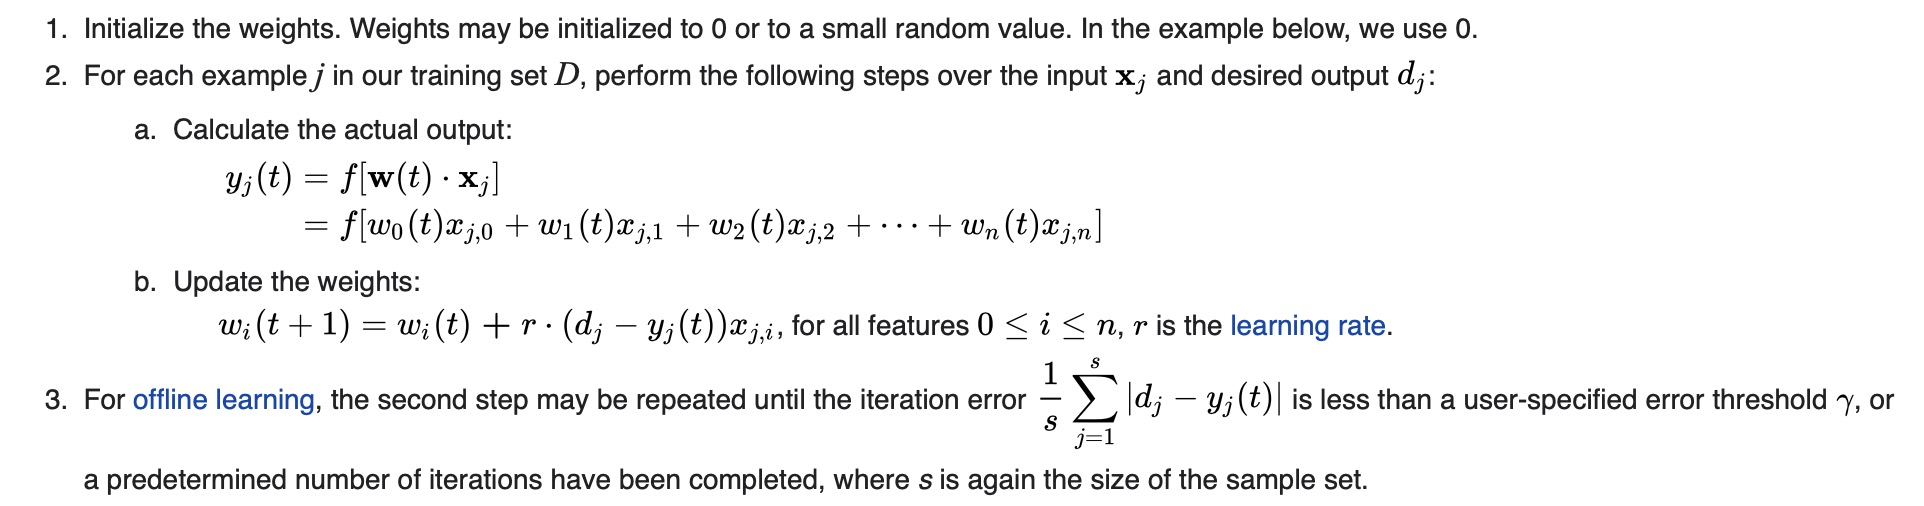

### Datasets:

- Penguins

The Penguins Dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. These data were collected from 2007 - 2009 by Dr. Kristen Gorman's team. It consists of 344 rows and 7 columns. The three different species of penguins are Chinstrap, Adélie, and Gentoo penguins.

### Reference:

https://www.simplilearn.com/tutorials/deep-learning-tutorial/perceptron

https://en.wikipedia.org/wiki/Perceptron

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the penguins dataset into a pandas DataFrame object
penguins = pd.read_csv("penguins.csv")

In [2]:
#First check the general information of the dataset
penguins.iloc[:100]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
98,Adelie,Dream,33.1,16.1,178.0,2900.0,FEMALE


We can see that Row #3 has some NaN. Therefore, we need to delete the NaN rows.

In [3]:
penguins = penguins.dropna()

For training, we set "bill_length_mm" and "bill_depth_mm" as X and the sex of penguins as Y. Also, we change all the MALE to -1 and all the FEMALE to 1.

In [4]:
# Store the desired sex values in the numpy array y
y = penguins.sex.values
# Convert each entry of y with MALE to -1 and FEMALE to 1
y = np.where(y == 'MALE', -1, 1)

# Store the desired feature measurements in the matrix X
X = penguins[["bill_length_mm", "bill_depth_mm"]].values

In [5]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [6]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [7]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

# The result may not be so good according to the TRUE and FALSE pattern.
# There are lots of FALSE in it.

[ True False False False  True False  True False  True  True False False
  True False  True False  True False  True  True False  True False False
  True False  True False  True  True  True  True False False  True False
  True False  True  True  True  True False  True False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True  True False  True
  True  True  True  True False  True False  True  True False  True False
 False  True  True  True  True  True False  True  True  True  True  True
  True  True False  True False  True  True  True  True  True False  True
 False  True False  True  True  True  True  True False  True  True  True
 False  True False  True False  True False  True False  True  True  True
  True  True False  True  True  True  True  True  True False False  True
  True  True False  True  True False  True False False  True False  True
 False  True False  True False  True  True False Fa

Then we plot a figure to see the classification result clearly.

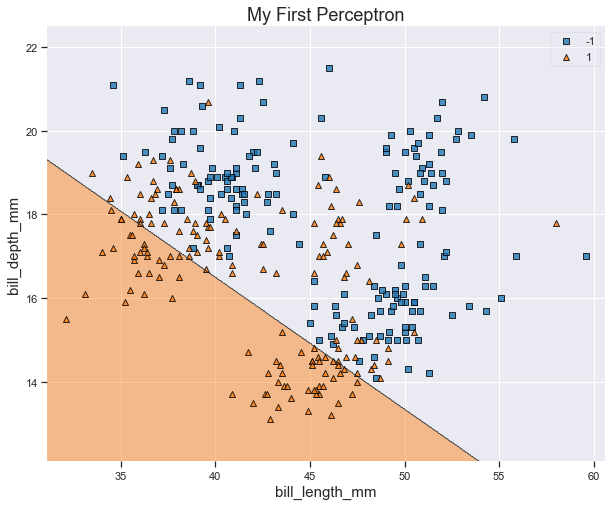

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("bill_depth_mm", fontsize = 15)
plt.show()

The result is very interesting. If we classify a penguin to be MALE, its correctness is more than 95%. However, if we classify a penguin to be FEMALE, we only have 50% accuracy. Below, I draw a training history plot to see the improvement that iterations bring.

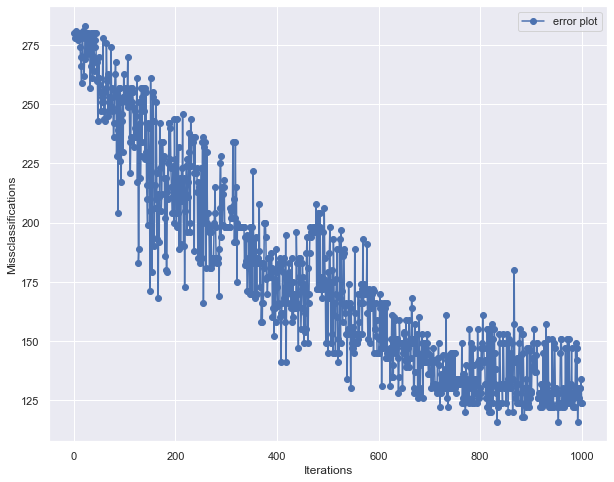

In [9]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

When iteration becomes 700, the misclassification reaches the lowest level 125. When the iterations become larger, the misclassification rate only vibrates around 125. Therefore, we only need 700 iterations to finish the training process.